[<img style="float: right;" src="https://raw.githubusercontent.com/taehojo/taehojo.github.io/master/assets/images/linktocolab.png" /> ](https://colab.research.google.com/github/taehojo/deeplearning_for_everyone_3rd/blob/master/run_project/09_Wine-Checkpoint_Overfitting.ipynb)

# 14장 모델의 성능 향상시키기

## 2. 모델의 업데이트 확인하기

### 기본 코드 불러오기

In [1]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.callbacks import ModelCheckpoint
from sklearn.model_selection import train_test_split

import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# 데이터를 입력합니다.
df = pd.read_csv('../data/wine.csv', header=None)

# 와인의 속성을 X로 와인의 분류를 y로 저장합니다.
X = df.iloc[:,0:12]
y = df.iloc[:,12]

#학습셋과 테스트셋으로 나눕니다.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=True)

# 모델 구조를 설정합니다.
model = Sequential()
model.add(Dense(30,  input_dim=12, activation='relu'))
model.add(Dense(12, activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
model.summary()

#모델을 컴파일합니다.
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])


Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 30)                390       
_________________________________________________________________
dense_1 (Dense)              (None, 12)                372       
_________________________________________________________________
dense_2 (Dense)              (None, 8)                 104       
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 9         
Total params: 875
Trainable params: 875
Non-trainable params: 0
_________________________________________________________________


### 모델의 저장 설정 및 실행

In [2]:
# 모델 저장의 조건을 설정합니다.
modelpath="../data/model/all/{epoch:02d}-{val_accuracy:.4f}.hdf5"
checkpointer = ModelCheckpoint(filepath=modelpath, verbose=1)

# 모델을 실행합니다. 
history=model.fit(X_train, y_train, epochs=50, batch_size=500, validation_split=0.25, verbose=0, callbacks=[checkpointer])


Epoch 00001: saving model to ../data/model/all\01-0.7685.hdf5

Epoch 00002: saving model to ../data/model/all\02-0.8800.hdf5

Epoch 00003: saving model to ../data/model/all\03-0.8708.hdf5

Epoch 00004: saving model to ../data/model/all\04-0.8708.hdf5

Epoch 00005: saving model to ../data/model/all\05-0.8923.hdf5

Epoch 00006: saving model to ../data/model/all\06-0.9077.hdf5

Epoch 00007: saving model to ../data/model/all\07-0.9077.hdf5

Epoch 00008: saving model to ../data/model/all\08-0.9131.hdf5

Epoch 00009: saving model to ../data/model/all\09-0.9138.hdf5

Epoch 00010: saving model to ../data/model/all\10-0.9154.hdf5

Epoch 00011: saving model to ../data/model/all\11-0.9162.hdf5

Epoch 00012: saving model to ../data/model/all\12-0.9185.hdf5

Epoch 00013: saving model to ../data/model/all\13-0.9185.hdf5

Epoch 00014: saving model to ../data/model/all\14-0.9200.hdf5

Epoch 00015: saving model to ../data/model/all\15-0.9177.hdf5

Epoch 00016: saving model to ../data/model/all\16-0.91

In [3]:
# 테스트 결과를 출력합니다.
score=model.evaluate(X_test, y_test)
print('Test accuracy:', score[1])

41/41 [==============================] - 0s 1ms/step - loss: 0.1590 - accuracy: 0.9423
Test accuracy: 0.942307710647583


## 3. 과적합 확인하기

In [4]:
# 그래프 확인을 위한 긴 학습 (컴퓨터 환경에 따라 시간이 다소 걸릴수 있습니다)
history=model.fit(X_train, y_train, epochs=2000, batch_size=500, verbose=0, validation_split=0.25) 

In [5]:
# history에 저장된 학습 결과를 확인해 보겠습니다. 
hist_df=pd.DataFrame(history.history)
hist_df

,loss,accuracy,val_loss,val_accuracy
0,0.157924,0.944316,0.173545,0.931538
1,0.156247,0.943546,0.168429,0.933846
2,0.152906,0.942777,0.166696,0.933846
3,0.151120,0.945086,0.165191,0.932308
4,0.148956,0.945856,0.159559,0.936154
...,...,...,...,...
1995,0.018356,0.994355,0.066240,0.985385
1996,0.017976,0.994355,0.064675,0.985385
1997,0.018248,0.994098,0.064908,0.985385
1998,0.018649,0.994611,0.065713,0.984615


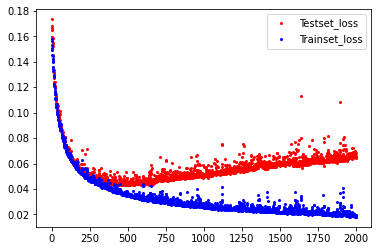

In [6]:
# y_vloss에 테스트셋의 오차를 저장합니다.
y_vloss=hist_df['val_loss']

# y_loss 에 학습셋의 오차를 저장합니다.
y_loss=hist_df['loss']

# x값을 지정하고 정확도를 파란색으로, 오차를 빨간색으로 표시합니다. 
x_len = np.arange(len(y_loss))
plt.plot(x_len, y_vloss, "o", c="red", markersize=2, label='Testset_loss')
plt.plot(x_len, y_loss, "o", c="blue", markersize=2, label='Trainset_loss')

plt.legend(loc='upper right')
plt.show()